In [1]:
#import libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
filepath = "cars11.csv"
df = pd.read_csv(filepath,na_values=['',' '])
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [3]:
df.isna().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [4]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    258 non-null    float64
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


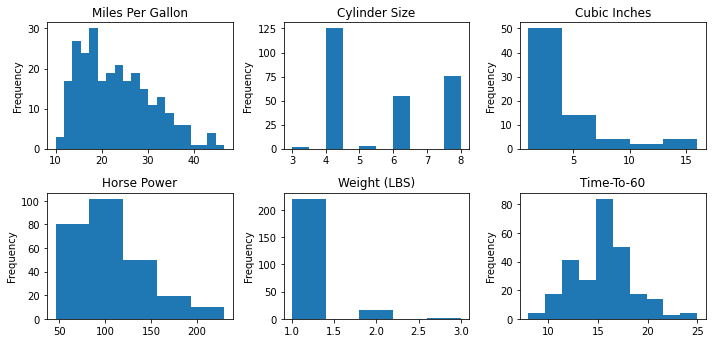

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
df["mpg"].plot(kind="hist", title="Miles Per Gallon", bins=20)

plt.subplot(3,3,2)
df[" cylinders"].plot(kind="hist", title="Cylinder Size")

plt.subplot(3,3,3)
df[" cubicinches"].value_counts().plot(kind="hist", title="Cubic Inches", bins=5)

plt.subplot(3,3,4)
df[" hp"].plot(kind="hist", title="Horse Power", bins=5)

plt.subplot(3,3,5)
df[" weightlbs"].value_counts().plot(kind="hist", title="Weight (LBS)", bins=5)

plt.subplot(3,3,6)
df[" time-to-60"].plot(kind="hist", title="Time-To-60")
plt.tight_layout()

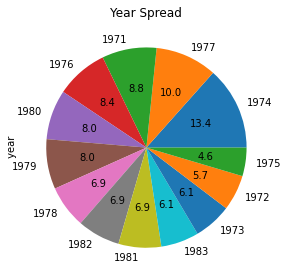

In [7]:
df[" year"].value_counts().plot(kind="pie", title="Year Spread", autopct='%.1f')
plt.tight_layout()

In [8]:
df = df.dropna()

In [9]:
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df.iloc[:, -1].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(250, max_depth=15, min_samples_split=3, random_state=42)
model=rfc.fit(x_train,y_train)

In [28]:
model.score(x_test, y_test)

0.8076923076923077

In [31]:
y_pre = model.predict(x_test)

In [32]:
score = pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
score[:5]


,Actual,Predicted
0,US.,US.
1,Japan.,Japan.
2,US.,US.
3,Japan.,Japan.
4,US.,US.


In [33]:
#enter values for prediction
print(model.predict([[14,8,350,165,4209,12,1972]]))

[' US.']
